## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [1]:
# Start solution here
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import datasets, linear_model



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,14,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Baseline Accuracy:  0.6252430088230896
Bagging Accuracy Score:  0.9395842679826529
Random Forest Classifier Accuracy Score:  0.8932256617317182
AdaBoost Accuracy Score:  0.9445192163900105


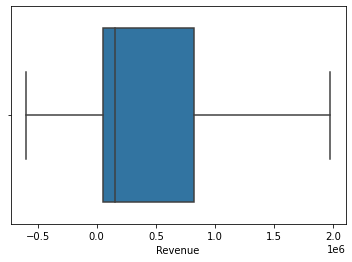

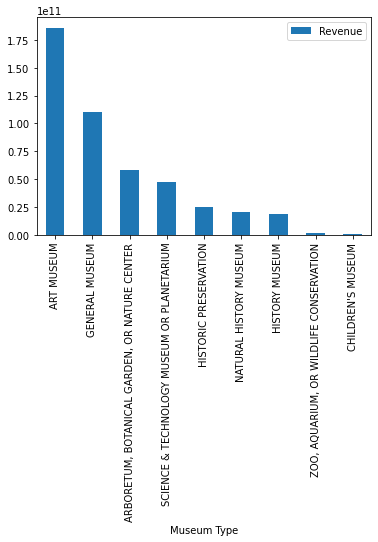

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Reading in the file 
file_handle = drive.CreateFile({'id': '1zt738_C3gSxkAgZIrXkbak9Jcn8vTXlf'}) 
file_handle.GetContentFile('museums.csv')
museums = pd.read_csv('museums.csv')

#I want to see the spread of the revenue, but there are many missing and 0 values. I will remove them
better_data = museums[museums['Revenue']!=0]
sns.boxplot(x=better_data['Revenue'], showfliers=False)

#To see which types of museums are the most popular (most revenue), we will plot it here
pop_museum_type = museums.groupby(['Museum Type']).agg({'Revenue':'sum'})
pop_museum_type = pop_museum_type.sort_values(by='Revenue', ascending=False)
pop_museum_type.plot(kind = 'bar')

#Dropping unnecessary columns 
museums.drop(['Museum ID','Legal Name', 'Alternate Name','Institution Name','Street Address (Administrative Location)','City (Administrative Location)','State (Administrative Location)','Zip Code (Administrative Location)','Street Address (Physical Location)','City (Physical Location)','State (Physical Location)','Zip Code (Physical Location)','Phone Number','Latitude','Longitude','Locale Code (NCES)','County Code (FIPS)','State Code (FIPS)','Region Code (AAM)','Employer ID Number','Tax Period'],axis = 1, inplace = True)
museums = museums.dropna(axis=0)


#Storing feature and target variables
feature_cols = ['Museum Name','Museum Type','Income','Revenue']
X = museums[feature_cols]
y = museums['Profitable']
df2 = pd.get_dummies(X)

#Splitting the data into training and testing sets and computing the baseline classification accuracy. 
xTrain, xTest, yTrain, yTest = train_test_split(df2, y, test_size = 0.3, random_state = 42)
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(xTrain,yTrain)
baseline_acc = dummy_classifier.score(xTest,yTest)
print("Baseline Accuracy: ", baseline_acc)

model_bagging = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 10, random_state = 42)
model_bagging.fit(xTrain, yTrain)
pred_bagging = model_bagging.predict(xTest)
acc_bagging = accuracy_score(yTest, pred_bagging)
print("Bagging Accuracy Score: ", acc_bagging)

model_rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
model_rf.fit(xTrain, yTrain)
predict_rf = model_rf.predict(xTest)
acc_rf = accuracy_score(yTest,predict_rf)
print("Random Forest Classifier Accuracy Score: ", acc_rf)

ada_boost1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth =4), n_estimators=200, random_state=42, learning_rate=.05)
ada_boost1.fit(xTrain, yTrain)
predict_ada = ada_boost1.predict(xTest)
acc_ada = accuracy_score(yTest, predict_ada)
print("AdaBoost Accuracy Score: ",acc_ada)



#This data has many duplicate rows, so we will be cleaning it up a bit and removing them. 
museums = museums.drop_duplicates()










In [3]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, df2, y, cv=5)
print(scores)

In [4]:
lasso = linear_model.Lasso()
print(cross_val_score(lasso,df2,y,cv=3))

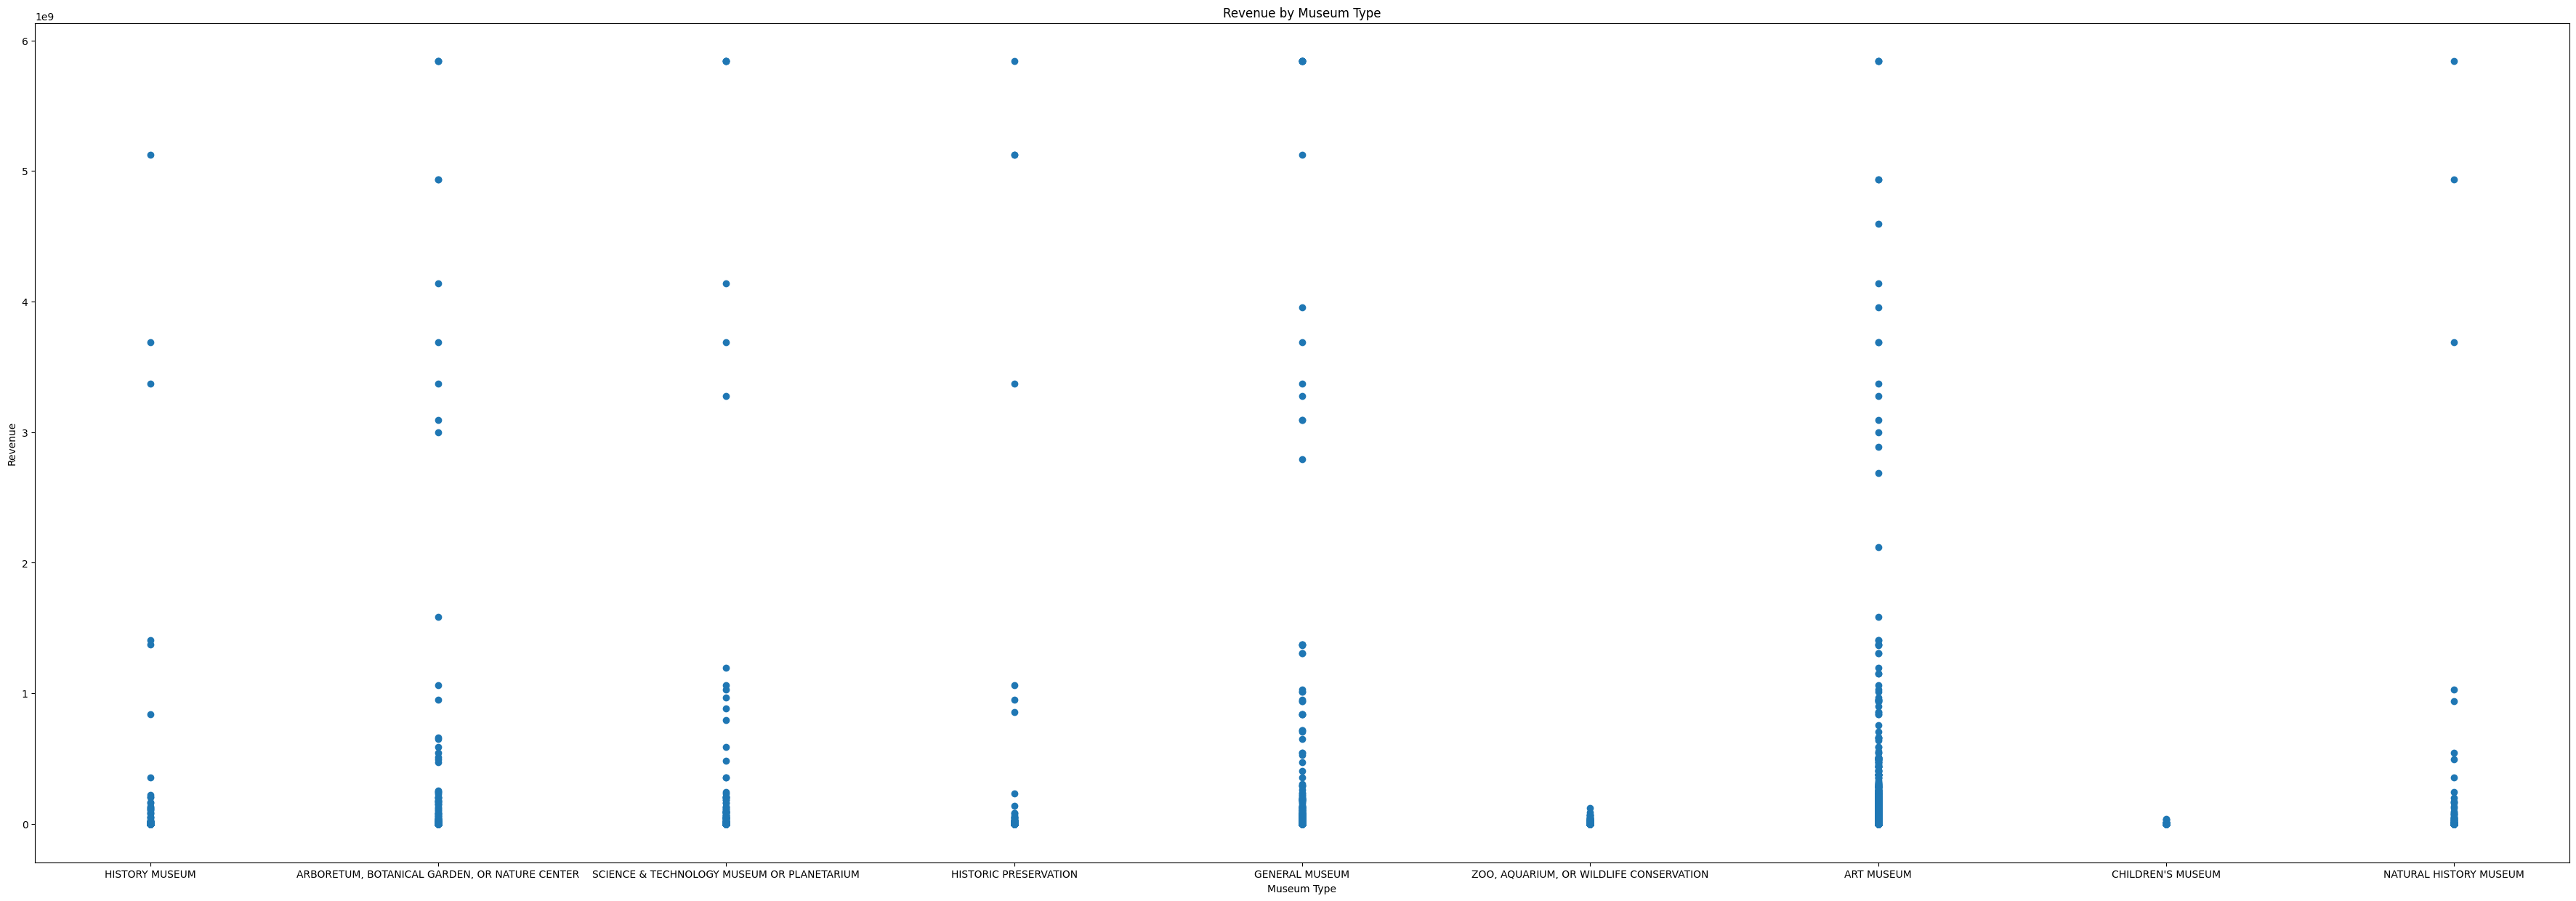

In [20]:
plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(45)
plt.ylabel('Revenue')
plt.xlabel('Museum Type')
plt.title('Revenue by Museum Type')
ax.scatter(x=museums['Museum Type'],y=museums['Revenue'])
plt.show()

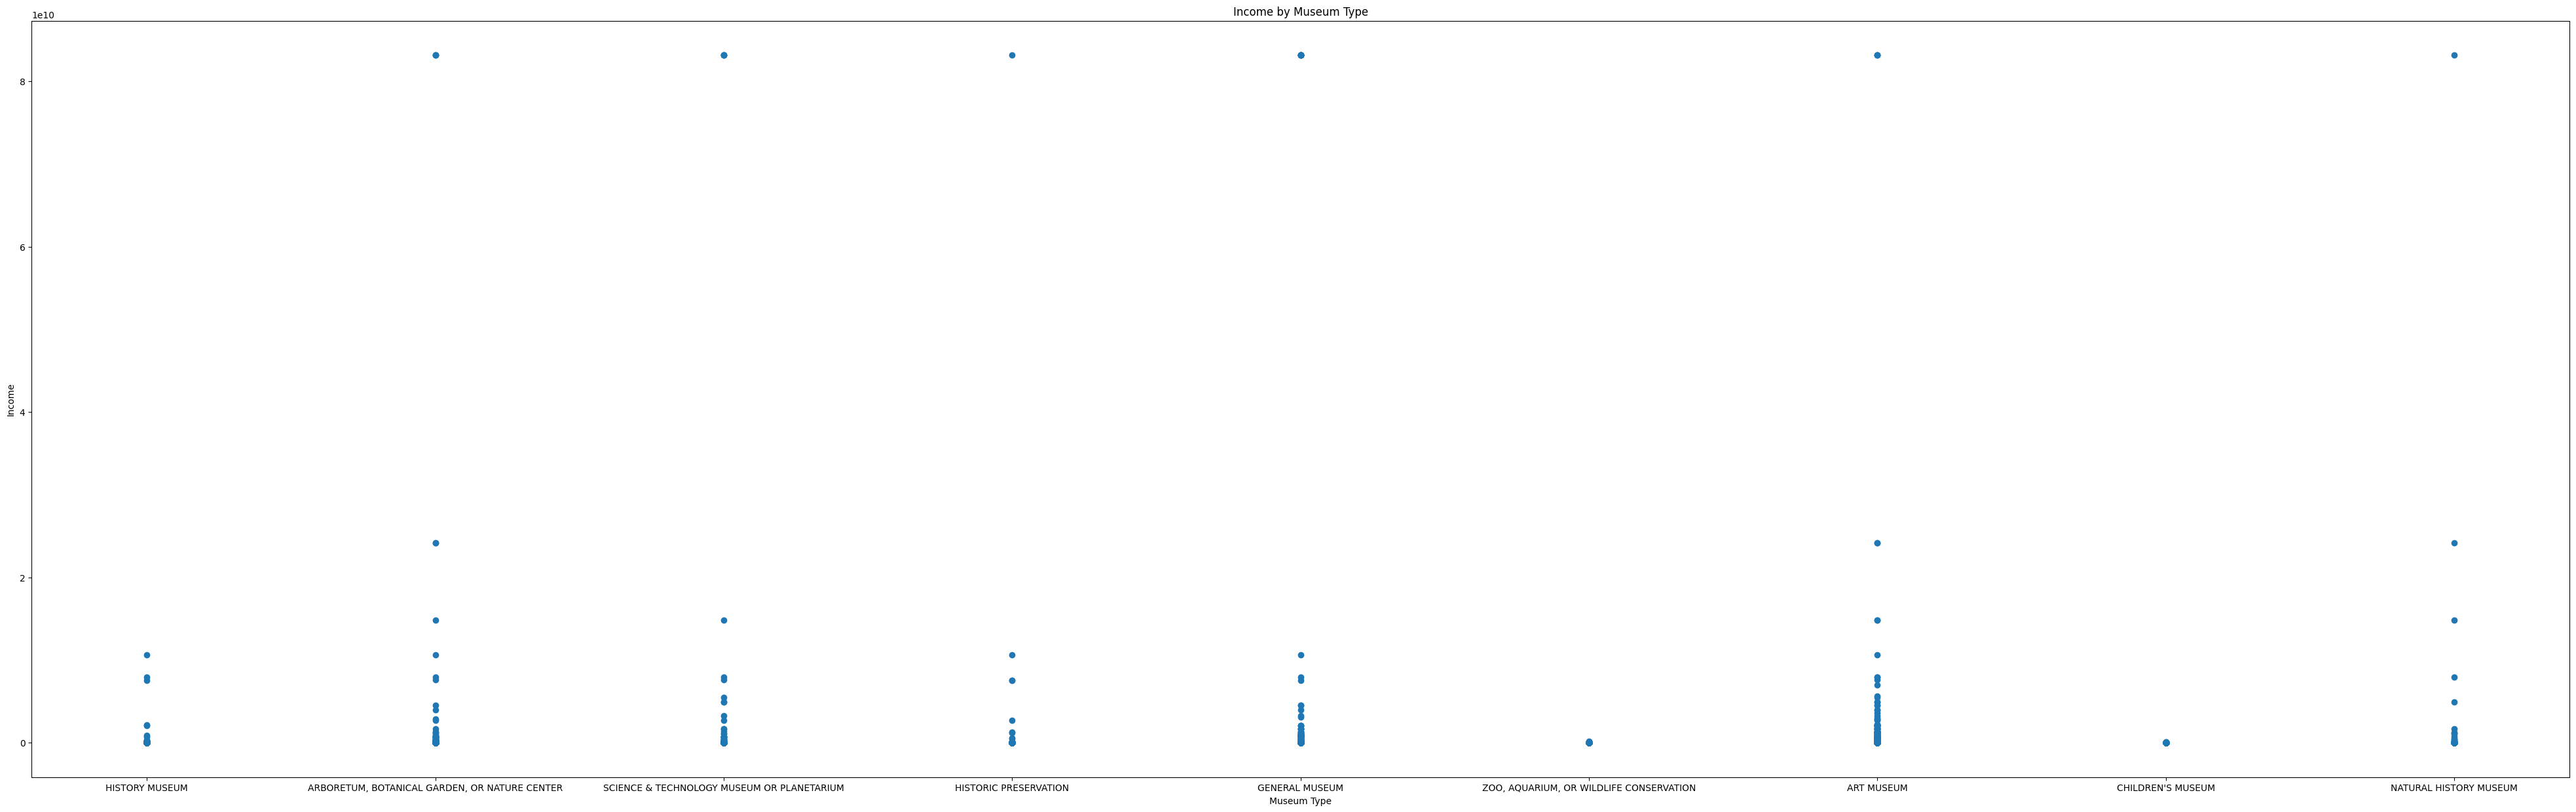

In [8]:
plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(50)
plt.ylabel('Income')
plt.xlabel('Museum Type')
plt.title('Income by Museum Type')
ax.scatter(x=museums['Museum Type'],y=museums['Income'])
plt.show()

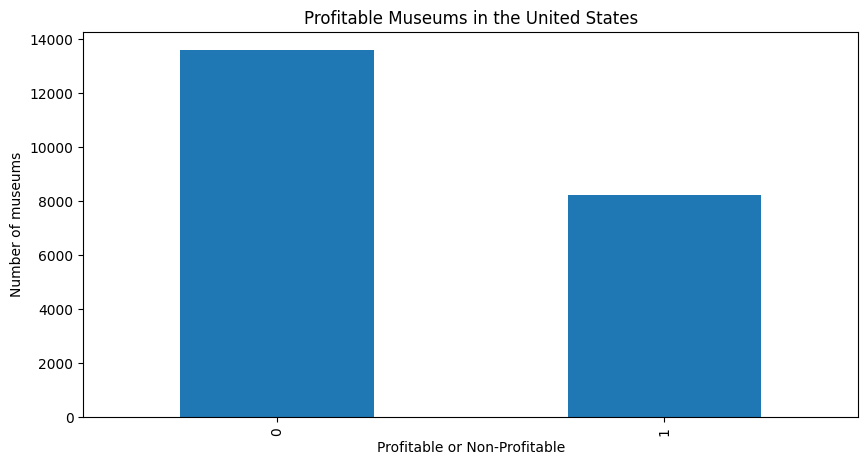

In [14]:
museums['Profitable'].value_counts().nlargest(20).plot(figsize=(10,5), kind = 'bar')
plt.title("Profitable Museums in the United States")
plt.ylabel("Number of museums")
plt.xlabel("Profitable or Non-Profitable")
plt.show()